In [1]:
from vpython import *
from matplotlib import pyplot as plt
import math

<IPython.core.display.Javascript object>

# Ball Falling - No Air Resistance

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Max Velocity vs Initial Height')

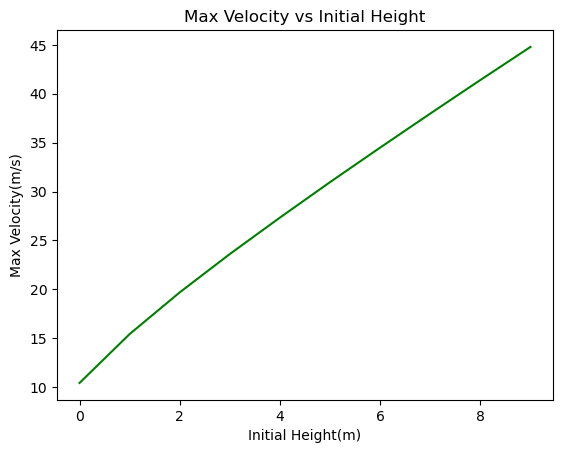

In [11]:
scene=canvas()
ball = sphere(pos=vector(0,0,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,-6,0), size=vector(12,.2,12), color=color.blue)
ball.velocity = vector(0,0,0)
g = -9.8
deltat = 0.005
t = 0 
max_velocities = []
height = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(height)):
    ball.pos.y = height[i]
    max_velo = 0
    t = 0
    while t < 3:
        rate(100)
        ball.velocity.y = ball.velocity.y + g*deltat
        if -ball.velocity.y > max_velo:
            max_velo = -ball.velocity.y
        if ball.pos.y < ground.pos.y + .5:
            ball.pos.y = 0 
            break
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
    max_velocities.append(max_velo)
plt.plot(height,max_velocities,color='green')
plt.xlabel('Initial Height(m)')
plt.ylabel('Max Velocity(m/s)')
plt.title("Max Velocity vs Initial Height")

Assumptions/Decisions:
   - Ball dropped with initial velocity of 0m/s
   - Ball has radius of .5m 
   - No friction between ball and ground
   - No wind resistance
   - Timestep: .005 seconds
   

## Ball Falling - Air Resistance

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Max Velocity vs Initial Height')

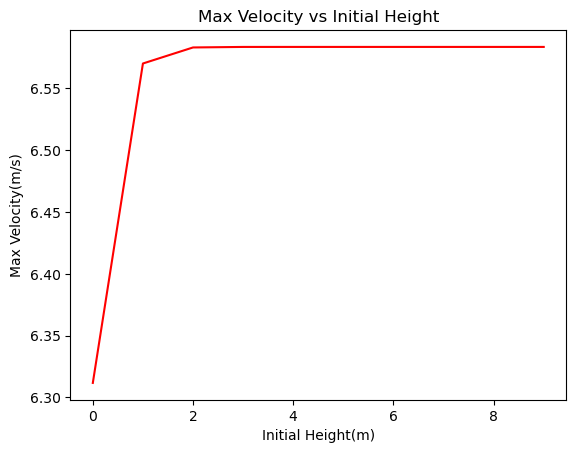

In [10]:
scene=canvas()
ball = sphere(pos=vector(0,0,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,-6,0), size=vector(12,.2,12), color=color.blue)
ball.velocity = vector(0,0,0)
g = -9.8
deltat = 0.005
t = 0 
#cross sectional area of a sphere(m^2) = A
A = math.pi/4
#Drag coefficient of a sphere= C
C = .47
#Density of air(kg)/(m^3) = rho
rho = 1.225
max_velocities = []
height = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(height)):
    ball.pos.y = height[i]
    max_velo = 0
    t = 0
    while t < 3:
        rate(100)
        air_resistance = (1/2)*rho*C*A*math.pow(ball.velocity.y,2)
        ball.velocity.y = ball.velocity.y + g*deltat + air_resistance*deltat
        if -ball.velocity.y > max_velo:
            max_velo = -ball.velocity.y
        if ball.pos.y < ground.pos.y + .5:
            ball.pos.y = 0 
            break
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
    max_velocities.append(max_velo)
plt.plot(height,max_velocities,color='red')
plt.xlabel('Initial Height(m)')
plt.ylabel('Max Velocity(m/s)')
plt.title("Max Velocity vs Initial Height")

Assumptions/Decisions:
   - Ball dropped with initial velocity of 0m/s
   - Ball has radius of .5m 
   - No friction between ball and ground
   - cross sectional area of a sphere = pi*r^2
   - density due to air = 1.225 kg/m^3 
   - drag coefficient of a sphere is .47
   - Mass of ball = 1kg
   - Timestep: .005 seconds
   

https://en.wikipedia.org/wiki/Drag_(physics)

Results:
- Without air resistance the ball falling traveled at a much greater maximum velocity compared to the ball falling with air resistance. This makes logical sense because the air resistance is a force that is acting in the opposite direction of the force due to gravity which results in the ball falling at a slower speed. 

   # Ball Bouncing Elastic

In [4]:
scene=canvas()
ball = sphere(pos=vector(0,0,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,-6,0), size=vector(12,.2,12), color=color.blue)
ball.velocity = vector(0,-10,0)
g = -9.8
deltat = 0.005
t = 0 
while t < 3:
    rate(100)
    ball.velocity.y = ball.velocity.y + g*deltat
    if ball.pos.y < ground.pos.y + .5:
        ball.velocity.y = -ball.velocity.y
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat

<IPython.core.display.Javascript object>

Assumptions/Decisions:
   - Ball dropped with initial velocity of 10m/s
   - Ball has radius of .5m 
   - No friction between ball and ground
   - No wind resistance
   - Perfectly elastic condition where zero kinetic energy is lost
   - Timestep: .005 seconds
  

# Ball Bouncing Inelastic

In [ ]:
scene=canvas()
ball = sphere(pos=vector(0,0,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,-6,0), size=vector(12,.2,12), color=color.blue)
ball.velocity = vector(0,-10,0)
g = -9.8
ball_mass = 1
earth_mass = 5.972*math.pow(10,24)
deltat = 0.005
t = 0 
while t < 100:
    rate(100)
    ball.velocity.y = ball.velocity.y + g*deltat
    if ball.pos.y < ground.pos.y + .5:
        ball.velocity.y = (-.5*earth_mass*ball.velocity.y + ball_mass*ball.velocity.y)/(earth_mass + ball_mass)
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat

<IPython.core.display.Javascript object>

Assumptions/Decisions:
   - Ball dropped with initial velocity of 10m/s
   - Ball has radius of .5m 
   - No friction between ball and ground
   - No wind resistance
   - Earth mass is 5.973*10^24kg
   - Coefficient of restitution is .5
   - Timestep: .005 seconds
  

https://en.wikipedia.org/wiki/Inelastic_collision

Results:
- The elastic condition resulted in the ball traveling at a much faster velocity because zero kinetic energy is lost in the elastic scenario. The inelastic collision traveled at a slower velocity after the collision because some kinetic energy was lost due to the collision and bounced to a lower height as a result. The ball in the inelastic collision eventually came to a stop as time elapsed. The ball in the elastic collision reached the same initial height it was dropped from because it's velocity is just negated when it reaches the ground. 

# Cannon

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Length vs Launch Angle')

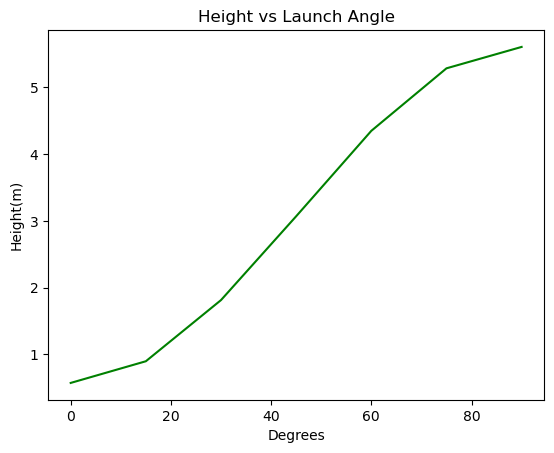

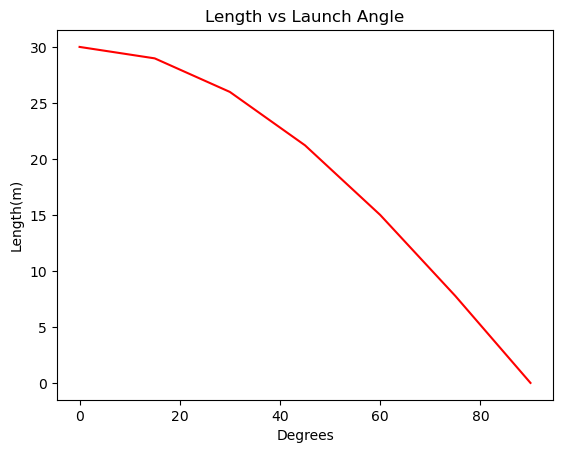

In [8]:
scene=canvas()
ball = sphere(pos=vector(0,.5,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,0,0), size=vector(50,.2,50), color=color.blue)
ball.velocity = vector(0,0,0)
theta = [0,15,30,45,60,75,90]
deltat = 0.005
t = 0 
g = -9.8
max_heights = []
max_lengths = []
for i in range(len(theta)):
    radians = (theta[i]*math.pi)/180
    ball.velocity.y = 10*math.sin(radians)
    ball.velocity.x = 10*math.cos(radians)
    max_height = 0
    max_length = 0
    t = 0
    ball.pos=vector(0,.5,0)
    while t < 3:
        rate(100)
        ball.velocity.y = ball.velocity.y + g*deltat
        if ball.pos.y > max_height:
            max_height = ball.pos.y
        if ball.pos.x > max_length:
            max_length = ball.pos.x
        if ball.pos.y < ground.pos.y + .5:
            ball.velocity.y = -ball.velocity.y
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
    
    max_heights.append(max_height)
    max_lengths.append(max_length)
plt.figure()
plt.plot(theta,max_heights,color='green')
plt.xlabel('Degrees')
plt.ylabel('Height(m)')
plt.title("Height vs Launch Angle")
plt.figure()
plt.plot(theta,max_lengths,color='red')
plt.xlabel('Degrees')
plt.ylabel('Length(m)')
plt.title("Length vs Launch Angle")

Assumptions/Decisions:
   - Ball dropped with initial velocity of 10m/s
   - Ball has radius of .5m 
   - No friction between ball and ground
   - No wind resistance
   - Timestep: .005 seconds
  

Results: 
 - A launch angle of 90 resulted in the greatest height the ball traveled. I verified the accuracy of my simulation by graphing different launch angles vs the maximum height the ball traveled during that entire simulation. As you can see the initial launch angle greatly impacted the maximum height the ball will travel and the greater the angle(0-90) the higher the ball will travel in the y-direction. I also compared the trajectory in the x-direction with the opposite affect occuring. The ball traveled the longest length at a 0 degree launch angle and traveled less distance in the x-direction as the angle increased from 0-90. 